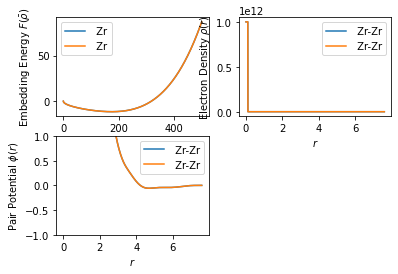

In [14]:
from ase.build import bulk
from ase.calculators.emt import EMT
from ase.phonons import Phonons
from ase.dft.kpoints import *
import matplotlib.pyplot as plt
import numpy as np
from ase.calculators.eam import EAM

zr1 = EAM(potential='Zr_3.eam.fs')
zr1.write_potential('Zr_3.eam.fs')
zr1.plot()

zr2 = EAM(potential='Zr_3.eam.fs')
zr2.write_potential('Zr_3.eam.fs')
zr2.plot()

In [5]:
k = 8.617333262e-5
T = 1200
# Setup crystal and EMT calculator
atoms = bulk('Zr', 'bcc',  a=3.6)
atoms.calc = zr2
N = 7
ph = Phonons(atoms, zr2, supercell=(N, N, N), delta=0.05)
ph.run()
ph.read(acoustic=True)
ph.clean()

#Trial1:
kv=(7, 7, 7)
kvc = monkhorst_pack(kv)
omega_kl, u_kl = ph.band_structure(kvc,verbose = False, modes = True)
omega = np.abs(omega_kl)

Farray = k*T*np.log(2*np.sinh(np.array(omega)/(2*k*T)))
F1 = sum(map(sum, Farray))

V = atoms.get_volume()
#P = 0.01623405461
P = 1/1581225.38445596
U = atoms.get_potential_energy()/N**3


print(F1/N**3 + P*V + U)





-0.7743441208332266


In [15]:
def Gibbs_bcc(T):
    k = 8.617333262e-5
    
    temp = str(T)
    tempname = (temp + "_phonon" +  "_bcc")
    
    atoms = bulk('Zr', 'bcc',  a=3.6)
    atoms.calc = zr2
    N = 7
    ph = Phonons(atoms, zr2, supercell=(N, N, N), delta=0.05,name = tempname)
    ph.run()
    ph.read(acoustic=True)
    ph.clean()

    #Trial1:
    kv=(7, 7, 7)
    kvc = monkhorst_pack(kv)
    omega_kl = ph.band_structure(kvc,verbose = False)
    omega = np.abs(omega_kl)

    Farray = k*T*np.log(2*np.sinh(np.array(omega)/(2*k*T)))
    F1 = sum(map(sum, Farray))

    V = atoms.get_volume()
    #P = 0.01623405461
    P = 1/1581225.38445596
    U = atoms.get_potential_energy()/N**3


    return(F1/N**3 + P*V + U),atoms.get_volume()

def Gibbs_hcp(T):
    k = 8.617333262e-5
    
    temp = str(T)
    tempname = (temp + "_phonon" +  "_hcp")
    
    atoms = bulk('Zr', 'hcp',  a=3.23, b = 5.18)
    atoms.calc = zr2
    N = 7
    ph = Phonons(atoms, zr2, supercell=(N, N, N), delta=0.05,name = tempname)
    ph.run()
    ph.read(acoustic=True)
    ph.clean()

    #Trial1:
    kv=(7, 7, 7)
    kvc = monkhorst_pack(kv)
    omega_kl = ph.band_structure(kvc,verbose = False)
    omega = np.abs(omega_kl)

    Farray = k*T*np.log(2*np.sinh(np.array(omega)/(2*k*T)))
    F1 = sum(map(sum, Farray))

    V = atoms.get_volume()
    #P = 0.01623405461
    P = 6.25e-3
    U = atoms.get_potential_energy()/N**3


    return(F1/N**3 + P*V + U),atoms.get_volume()
    

    

In [16]:
G_hcp = []
G_bcc = []

for i in range(13):
    T = 100+100*i
    
    gh,v = Gibbs_hcp(T)
    gb,vh = Gibbs_bcc(T)
    
    print(T)
    G_hcp.append(gh)
    G_bcc.append(gb)


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


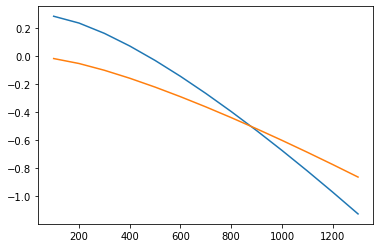

In [17]:
T = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
plt.plot(T,G_hcp)
plt.plot(T,G_bcc)